In [78]:
import pandas as pd
import numpy as np
np.random.seed(42)

p_values = [0.5, 1, 2, 5, float('inf')]
k = [2, 3, 4, 5] + list(range(10, 101, 10))
print("the dimensions k: ", k, "   len", len(k))

q = 10  # Number of data sets
n = 100  # Number of points per set

def generate_random_points(dimension_k) -> list:
   """
   generates points from the normal distribution. 

   :param dimension_k: the k-value for the dimension
   :return: describe what it returns
   """ 
   data_sets = []
   # excluding 0 with a small value
   for _ in range(q):
    data_sets.append(np.random.uniform(0.001, 1, (n, dimension_k)))
   return data_sets 


data_sets_for_k2 = generate_random_points(2)
data_set_1 = data_sets_for_k2[0] 
# print("data_set_1", data_set_1)
# print("data_set_1_0", data_set_1[0])



the dimensions k:  [2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]    len 14


In [83]:
def lp_norm_origin(data_set: np.ndarray, p: float) -> np.ndarray:
   """
   returns an array of the lp norms
   :param data_set: the data
   :param the p-norm
   :return: the lpnorms
   """
   norms = [0] * len(data_set)
   if p == float('inf'):
      for i, coordinate in enumerate(data_set):
            norms[i] += np.max(np.abs(coordinate))
      return norms
   else:
      for i, coordinate in enumerate(data_set):
         for j, feature in enumerate(coordinate): 
            norms[i] += np.pow(feature, p)
      return_value = np.power(norms,1/p)
      assert(len(return_value) == len(data_set))
      return return_value




#test: 
# lp_norm_origin_forp2 = lp_norm_origin(data_set_1, p= 2)
# print(len(lp_norm_origin_forp2))

# print("lp_norm_origin_forp2", lp_norm_origin_forp2)


def relative_contrast(dist_data):
   return (max(dist_data) - min(dist_data)) / min(dist_data)




# Assuming you need to calculate some deviation based on pairwise distances
# Here the script provided was incomplete, so let's assume you want to accumulate distances for some statistic.
def variance(data_set):
   sum_part = 0
   for distance in data_set:
         sum_part += (distance - np.mean(data_set)) ** 2 
   std_dev_sample  = np.sqrt(((1/ (len(data_set) - 1)) * sum_part))
   return std_dev_sample



# print("std_dev_sample: ", variance(lp_norm_origin_forp2))

def calculate_statistics(data_sets, p):
   statistics = []
   for data_set in data_sets:
      distances_per_dset = lp_norm_origin(data_set, p)
      stat_row = {
         'min': min(distances_per_dset),
         'max': max(distances_per_dset),
         'mean': np.mean(distances_per_dset), 
         'variance': variance(distances_per_dset),
         'relative contrast': relative_contrast(distances_per_dset)
      }
      statistics.append(stat_row)
   return pd.DataFrame(statistics)

def loop_norms(p):
    for norm in p:
        print("for p norm ", norm, "\n", calculate_statistics(data_sets=data_sets_for_k2, p=norm))

loop_norms(p_values)

for p norm  0.5 
         min       max      mean  variance  relative contrast
0  0.242344  3.668441  1.814765  0.857463          14.137304
1  0.139225  3.788938  1.916254  0.930353          26.214487
2  0.144575  3.921254  1.970521  0.931078          26.122653
3  0.486090  3.667344  1.810162  0.784804           6.544578
4  0.169952  3.720130  1.744389  0.826861          20.889263
5  0.118890  3.884843  2.051814  0.874691          31.675823
6  0.146817  3.288580  1.858885  0.807231          21.399227
7  0.287158  3.903476  1.898655  0.871278          12.593498
8  0.146775  3.838015  1.848016  0.874157          25.148882
9  0.358830  3.861959  1.933864  0.860228           9.762642
for p norm  1 
         min       max      mean  variance  relative contrast
0  0.135177  1.834492  0.969044  0.409704          12.571012
1  0.069781  1.894493  1.009742  0.442274          26.149280
2  0.073514  1.960645  1.042304  0.445531          25.670340
3  0.256387  1.835143  0.958585  0.379802          

In [80]:
# Question 4



def calculate_aggregate_statistics(p):

   aggr_statistics = []
   for dimension in k:
      data_sets = generate_random_points(dimension)

      statistics = []
      for data_set in data_sets:
         distances_per_dset = lp_norm_origin(data_set, p)
         stat_row = {
            'Min(Lp)': distances_per_dset.min(),
            'Max(Lp)': distances_per_dset.max(),
            'Avg(Lp)': np.mean(distances_per_dset), 
            'Var(Lp)': variance(distances_per_dset),
            'Ctr(Lp)': relative_contrast(distances_per_dset)
         }
         statistics.append(stat_row)
      aggr_statistics.append(pd.DataFrame(statistics).mean())
   return pd.DataFrame(aggr_statistics)


calculate_aggregate_statistics(2) 

,Min(Lp),Max(Lp),Avg(Lp),Var(Lp),Ctr(Lp)
0,0.101222,1.313863,0.761729,0.282796,23.121468
1,0.212169,1.529874,0.953410,0.279380,7.470302
2,0.388072,1.694525,1.106968,0.264275,3.446864
3,0.495067,1.893858,1.261990,0.276573,3.102116
4,1.083580,2.408981,1.830240,0.269402,1.243123
5,1.817300,3.171925,2.557002,0.264466,0.755361
6,2.412467,3.775886,3.152651,0.260625,0.575348
7,3.003373,4.302427,3.644068,0.252096,0.434201
8,3.425517,4.727953,4.085671,0.261151,0.382962
9,3.837584,5.099033,4.470593,0.250521,0.329762


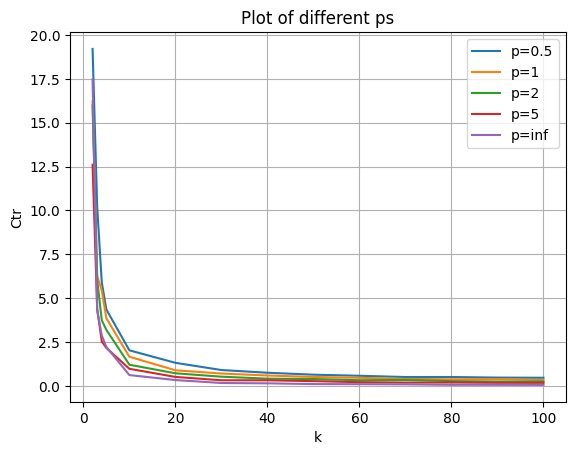

In [82]:
# Question 5 a)
import matplotlib.pyplot as plt

def calulate_ctrst(p):
   aggr_statistics = []
   for dimension in k:
      data_sets = generate_random_points(dimension)

      statistics = []
      for data_set in data_sets:
         distances_per_dset = lp_norm_origin(data_set, p)
         stat_row = {
            'Ctr(Lp)': relative_contrast(distances_per_dset)
         }
         statistics.append(stat_row)
      aggr_statistics.append(pd.DataFrame(statistics).mean())
   return pd.DataFrame(aggr_statistics)


def stats_for_norms(p):

   for norm in p: 
      plt.plot(k, calulate_ctrst(norm)['Ctr(Lp)'].values,  label=f'p={norm}')
   # Adding labels and title
   plt.xlabel('k')
   plt.ylabel('Ctr')
   plt.title('Plot of different ps')
   plt.legend()  # Show the legend

   # Grid
   plt.grid(True)

   # Show the plot
   plt.show()


stats_for_norms(p_values)

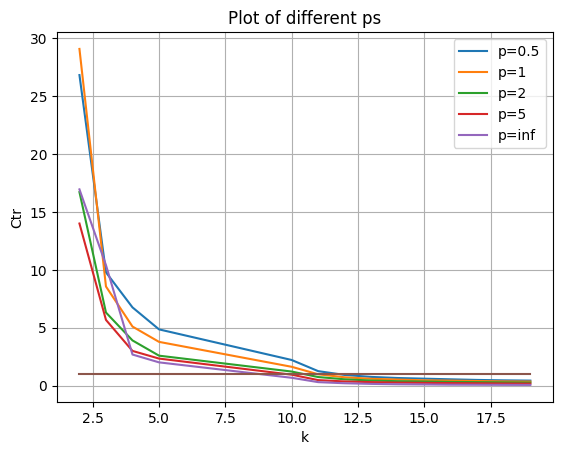

In [67]:
# alternative scaling
k_simple =  [2, 3, 4, 5] + list(range(10, 20, 1))

def stats_for_norms(p):

   for norm in p: 
      plt.plot(k_simple, calulate_ctrst(norm)['Ctr(Lp)'].values,  label=f'p={norm}')
   # Adding labels and title
   plt.plot(k_simple, np.ones(shape=len(k_simple)))
   plt.xlabel('k')
   plt.ylabel('Ctr')
   plt.title('Plot of different ps')
   plt.legend()  # Show the legend

   # Grid
   plt.grid(True)

   # Show the plot
   plt.show()


stats_for_norms(p_values)

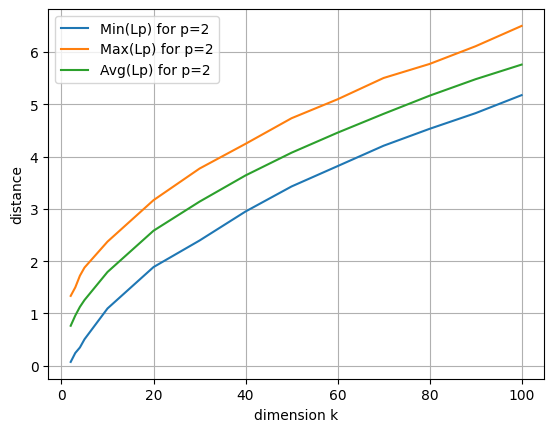

In [76]:
# Question 5 b)

def calculate_any_stat(p, string_stat):
   aggr_statistics = []
   for dimension in k:
      data_sets = generate_random_points(dimension)

      statistics = []
      for data_set in data_sets:
         distances_per_dset = lp_norm_origin(data_set, p)
         stat_row = {
            'Min(Lp)': distances_per_dset.min(),
            'Max(Lp)': distances_per_dset.max(),
            'Avg(Lp)': np.mean(distances_per_dset), 
         }
         statistics.append(stat_row[string_stat])
      aggr_statistics.append(pd.DataFrame(statistics).mean())
   return pd.DataFrame(aggr_statistics)

def stats_for_norms_all(p):
   stat_row = [
      'Min(Lp)',
      'Max(Lp)',
      'Avg(Lp)', 
   ]
   for stat in stat_row:
      x = plt.plot(k, calculate_any_stat(p, stat),  label=f'{stat} for p={p}')
   # Adding labels and title
   y = range(1, 11)  # This creates a range from 1 to 10
   plt.xlabel(f'dimension k')
   plt.ylabel('distance')
   plt.title('')
   plt.legend()  # Show the legend

   # Grid
   plt.grid(True)

   # Show the plot
   plt.show()

stats_for_norms_all(2)

In [ ]:
# additional thingies


def stats_for_norms_all(p):
   stat_row = {
      'Min(Lp)',
      'Max(Lp)',
      'Avg(Lp)', 
      'Var(Lp)',
      'Ctr(Lp)'
   }
   for stat in stat_row:
      y = plt.plot(k_simple, calculate_any_stat(p, 'Ctr(Lp)'),  label=f'p={p}')
   # Adding labels and title
   plt.xlabel('k')
   plt.ylabel('Ctr')
   plt.title('')
   plt.legend()  # Show the legend

   # Grid
   plt.grid(True)

   # Show the plot
   plt.show()

stats_for_norms_all(p_values)
